# Processing Shakespeare

counting all the letters in shakespeares works!

First step is to read each line of the test file into a list of strings.

In [17]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a text file into a list of stringst for each line."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.strip()
        line = line.lower()
        lines.append(line)
    return lines

shakespeares_lines: list[str] = read_lines("./shakespeare.txt")
print(len(shakespeares_lines))

124193


In [18]:
# Example of "Slice Notation"

print(shakespeares_lines[0:5])

['', 'the sonnets', '', 'by william shakespeare', '']


# The next step of our analysis is to cound all the letters in shakespeare's complete body of work.

In [19]:
# Write a function namedd `tally`:
# Given a reference to a dictionary, and a key:
# Increase the value ostored at the key by 1 if the key exists
# otherwise set key's initial value to zero
# function that returns none

def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by incrementing value stored at key by 1."""
    return_dict: dict[str, int]
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequency of all lettersin a list of strings"""
    counts: dict[str, int] = {}
    # try looping through each line in `lines`
    # then loop thriugh each char in line
    # Tally that char in the counts dictionary
    for key in lines:
        for char in key:
            if char.isalpha():
                tally(counts, char)
    return counts

shakespeares_counts: dict[str, int] = count_letters(shakespeares_lines)
print(shakespeares_counts)

{'t': 328987, 'h': 236584, 'e': 446147, 's': 248518, 'o': 313890, 'n': 242751, 'b': 61788, 'y': 94173, 'w': 89286, 'i': 253329, 'l': 169657, 'a': 288594, 'm': 111219, 'k': 35362, 'p': 58249, 'r': 237250, 'f': 80333, 'c': 87839, 'u': 128697, 'd': 149127, 'g': 68054, 'v': 37497, 'z': 1626, 'x': 5217, 'q': 3577, 'j': 4752}


Visualize with a bar chart this date about character frequencies.

<BarContainer object of 26 artists>

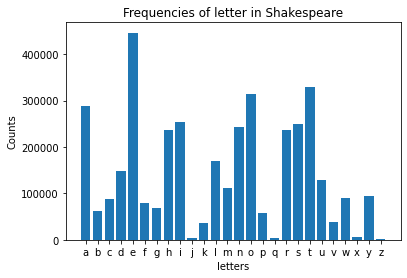

In [21]:
from matplotlib import pyplot

shakespeares_counts = dict(sorted(shakespeares_counts.items()))
pyplot.title("Frequencies of letter in Shakespeare")
pyplot.xlabel("letters")
pyplot.ylabel("Counts")
labels: list[str] = list(shakespeares_counts.keys())
values: list[int] = list(shakespeares_counts.values())
pyplot.bar(labels, values)

In [22]:
shakespeares_counts.items()

dict_items([('a', 288594), ('b', 61788), ('c', 87839), ('d', 149127), ('e', 446147), ('f', 80333), ('g', 68054), ('h', 236584), ('i', 253329), ('j', 4752), ('k', 35362), ('l', 169657), ('m', 111219), ('n', 242751), ('o', 313890), ('p', 58249), ('q', 3577), ('r', 237250), ('s', 248518), ('t', 328987), ('u', 128697), ('v', 37497), ('w', 89286), ('x', 5217), ('y', 94173), ('z', 1626)])